In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
import numpy as np
def create_stiffness_matrix(n):
    "Create a stiffness matrix of size n x n"

    # Create a zero matrix
    A = np.zeros((n, n))

    # Cell length
    h = 1.0/float(n - 1.0)
    
    # Add components of small matrix k to A
    k = np.array([[1.0, -1.0], [-1.0, 1.0]])
    for i in range(len(A) - 1):
        A[i:i+2, i:i+2] += (1.0/h)*k
    return A

In [49]:
def create_mass_matrix(n):
    "Create a mass matrix of size n x n"
    A = np.zeros((n, n))
    m = np.array([[1.0/3.0, 1.0/6.0], [1.0/6.0, 1.0/3.0]])

    # Cell length
    h = 1.0/float(n - 1.0)

    for i in range(len(A) - 1):
        A[i:i+2, i:i+2] += h*m
    return A

## Forward Euler

$$
M a_{n+1} = M a_{n} + \Delta t (b_{n} - K a_{n})
$$


## Backward Euler

$$
(M + \Delta t K) a_{n+1} = M a_{n} + \Delta t b_{n}
$$
    

## Crank-Nicolson

$$
(M + \frac{\Delta t}{2} K) a_{n+1} = M a_{n} - \frac{\Delta t}{2} M \dot{a}_{n} + \frac{\Delta t}{2} b_{n+1}
$$

## Tests

dt dt_crit: 4e-06 0.00118906064209


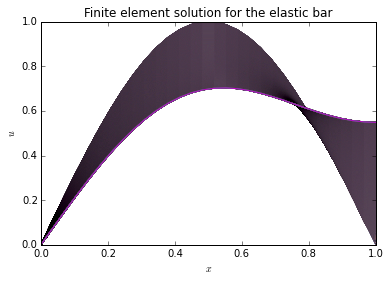

In [77]:
from scipy.interpolate import interp1d

n = 30
K = create_stiffness_matrix(n)
M = create_mass_matrix(n)

x = np.linspace(0, 1.0, n)
T0 = np.sin(x*np.pi)

a0 = T0.copy()
a1 = np.zeros(n)

h = 1.0/float(n-1.0)

dt = 0.000004
dt_crit = h*h
print "dt dt_crit:", dt, dt_crit

M[0,:] = 0.0
M[:,0] = 0.0
M[0,0] = 1.0

K[0,:] = 0.0
K[:,0] = 0.0
K[0,0] = 1.0

plt.xlabel('$x$')
plt.ylabel('$u$')
plt.title('Finite element solution for the elastic bar')
plt.plot(x, a0);
for n in range(1000):
    #b_hat = M.dot(a0) - dt*(K.dot(a0))
    #b_hat[0] = 0.0
    #a1 = np.linalg.solve(M, b_hat)
    #a0[:] = a1[:]
    
    #b_hat = M.dot(a0)
    #b_hat[0] = 0.0
    #a1 = np.linalg.solve(M + dt*K, b_hat)
    #a0[:] = a1[:]

    plt.plot(x, a1);
    #plt.show();